# Model evaluation and selection for a regression problem

In [67]:
%run src.ipynb
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

data = np.loadtxt('../data/data_sklearn.csv', delimiter=',')

X = data[:,0].reshape((-1,1))
y = data[:,1]

## Split the data into traing (60%), dev (20%), and test (20%) sets

In [68]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=0.6, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_,y_,train_size=0.5, random_state=1)
print(f"X.shape = {X.shape}, X_train.shape = {X_train.shape}, X_dev.shape = {X_dev.shape}, X_test.shape = {X_test.shape}")
print(f"y.shape = {y.shape}, y_train.shape = {y_train.shape}, y_dev.shape = {y_dev.shape}, y_test.shape = {y_test.shape}")

X.shape = (50, 1), X_train.shape = (30, 1), X_dev.shape = (10, 1), X_test.shape = (10, 1)
y.shape = (50,), y_train.shape = (30,), y_dev.shape = (10,), y_test.shape = (10,)


## Plot different data sets

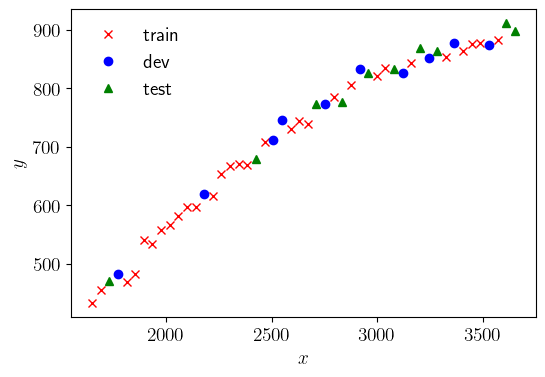

In [69]:
def PLOT():
    plt.figure(figsize=[6,4])
    plt.plot(X_train,y_train,'xr',label='train')
    plt.plot(X_dev,y_dev,'ob',label='dev')
    plt.plot(X_test,y_test,'^g',label='test')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(frameon=False)

PLOT()
plt.show()

## Write a for loop to evaluate polynomial models of different degrees

train_MSE, dev_MSE =
 [[406.19 551.78]
 [ 49.11  87.7 ]
 [ 47.62  81.15]
 [ 47.15  79.43]
 [ 47.14  79.59]]


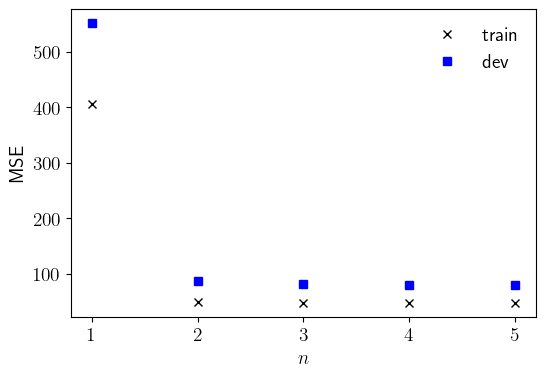

In [70]:
train_MSE = []
dev_MSE = []
models = []
norm_ls = []

degrees = range(1,6)
for degree in degrees:
    # Generate the mapped features
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_trainMapped = poly.fit_transform(X_train)
    
    # Normalize the mapped training data
    norm_l = tf.keras.layers.Normalization(axis=-1)
    norm_l.adapt(X_trainMapped)
    X_trainMappedn = norm_l(X_trainMapped)
    norm_ls.append(norm_l)
    
    # Fit the normalized mapped training data
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(X_trainMappedn,y_train)
    models.append(regr)

    # Compute mean-squared-error for the training data
    yPredict = regr.predict(X_trainMappedn)
    train_MSE.append(0.5*mean_squared_error(y_train,yPredict))
    
    # Map and normalize the dev data
    X_devMapped = poly.fit_transform(X_dev)
    X_devMappedn = norm_l(X_devMapped)
    
    # Compute mean-square-error for the dev data
    yPredict = regr.predict(X_devMappedn)
    dev_MSE.append(0.5*mean_squared_error(y_dev,yPredict))
    

print(f"train_MSE, dev_MSE =\n {np.c_[train_MSE,dev_MSE]}")

    
plt.figure(figsize=[6,4])
plt.plot(degrees,train_MSE,'xk',label='train')
plt.plot(degrees,dev_MSE,'sb',label='dev')
plt.xlabel('$n$')
plt.ylabel('MSE')
plt.legend(frameon=False)
plt.show()

## Select the best model

In [71]:
degree = degrees[np.argmin(dev_MSE)]
print(f"lowest dev MSE occurs for a polynomial of degree n = {degree}")

lowest dev MSE occurs for a polynomial of degree n = 4


## Report the MSE for test data

In [72]:
index = np.argmin(dev_MSE)
poly = PolynomialFeatures(degree=degrees[index], include_bias=True)
X_testMapped = poly.fit_transform(X_test)
X_testMappedn = norm_ls[index](X_testMapped)
yPredict = models[index].predict(X_testMappedn)

print(f"train MSE is {train_MSE[index]}")
print(f"dev MSE is {dev_MSE[index]}")
print(f"test MSE is {0.5*mean_squared_error(y_test,yPredict)}")

train MSE is 47.1463707040191
dev MSE is 79.43221404823902
test MSE is 104.6326069150847


## Plot the data and best polynomial fit

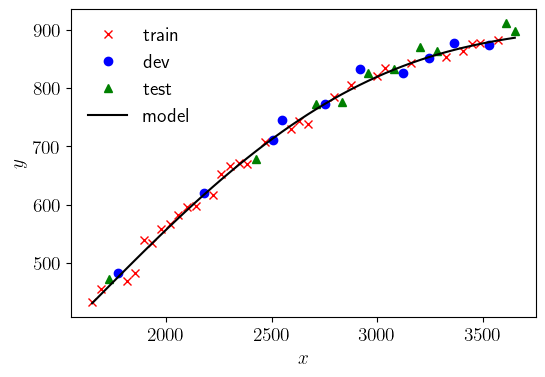

In [73]:
PLOT()
X_Mapped = poly.fit_transform(X)
X_Mappedn = norm_ls[index](X_Mapped)
yPredict = models[index].predict(X_Mappedn)
plt.plot(X,yPredict,'-k',label='model')

plt.legend(frameon=False)
plt.show()